<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>Classifying Presidential Rhetoric: An Analysis of Speech Sentimentality and Readability</h3> </center>
<center><h4>Eoin Daly, Constance Davis, and Mara Hubelbank</h4></center>

<hr style="height:2px; border:none; color:black; background-color:black;">

In [136]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms (at least three) in predicting/classifying your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables, which may be different from your ML problem.

While this section provides bullet points as prompts, your Introduction should consist of coherent paragraphs. As noted in the rubric, you are required delete all the prompts from this template, except for headings. Failing to do so will result in substantial point deductions.

**Problem Statement and Significance**

For our final project, we aim to analyze patterns in presidential speech in order to understand how the role of the president in establishing the national social agenda has changed over time. In particular, we focus on analyzing the sentimentality and readability of each presidential speech, and aim to extract from this time period-, party-, and speaker-specific trends. The rhetoric used by a nation’s leader is often a reflection of the issues most important to its people at a given point in time; as such, conducting a sentiment analysis of presidential speeches may offer insight into national trends of progressivism, and allow us to examine the changing significance of inclusivity within the United States leadership. 

**Previous Research**

TBD. TODOM

**Questions and Hypotheses**

Given the task of understanding presidential speech sentimentality and readability, we set out to tackle the following questions:
* Are there significant presidential speech sentimentality trends over time?
* Which visualization types fit best for representing the attributes and trends of our dataset?
* What machine learning algorithm (out of the ones we’ve seen used in class) can best classify the presidential speeches?
* To what degree of accuracy can we get a machine learning algorithm to predict the aforementioned target variables? (Using cross-validation procedures)
* Which feature variable will play the largest role in classification?
* Can we train a machine learning classification algorithm to classify the political party from which the speeches came? (This will utilize only speech data from after 1936, when the Democratic and Republican parties established their modern platforms.)

Using our final dataset, we plan to test multiple hypotheses regarding this issue. We hypothesize that:
* The frequency of female-gendered terms will increase over time.
* The frequency of male-gendered terms will decrease over time. 
* The use of religious language will decrease over time. 
* The use of equality-related rhetoric will decrease over time. 
* Religious language will be a key indicator of political party.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a **separate** script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables/rows included.


The sources where we obtained the original data:
* Corpus of Speeches, Presidents 1-44: http://www.thegrammarlab.com/?nor-portfolio=corpus-of-presidential-speeches-cops-and-a-clintontrump-corpus
* Corpus of Speeches, 45th President: https://millercenter.org/the-presidency/presidential-speeches 

We have multiple scripts for scraping, which are attached. Additionally, when we first created our dataset, we did some of our feature extraction, and most of our preprocessing, this script is called *InitialExtractionAndDFCreation.ipynb* please review it, as the data we clean and extract additional features from is created by the *InitialExtractionAndDFCreation.ipynb* script. 

Our finite dataset has 997 rows, restricted by the number of presidential speeches; this data was acquired primarily using an online corpora, and we used web-scraping to acquire the speeches of the 45th president. We have multiple features in the dataset -- for readability, we consider such attributes as word count, sentence count, and average syllables per word, and for sentimentality, we consider the frequencies of gendered pronouns, and terms pertaining to race/religion. The target/outcome variables for our dataset include political party, president, and time period. 

Columns in our original dataset, created by *InitialExtractionAndDFCreation.ipynb*:
* word_count : the number of words in a given speech (feature)
* sentence_count : the number of sentences in a given speech (feature)
* average_words : average number of words per sentence (feature)
* average_syl_per_word : average number of syllables per word (feature)
* flesch_kincaid_score : readability score (feature)
* flesch_kincaid_grade_level : score for level of reading difficulty (feature)
* total_gendered_terms : a sum of the gendered terms in the speech (feature)
* female_gendered_terms : a sum of the female-gendered terms in the speech (feature)
* male_gendered_terms : a sum of the male-gendered terms in the speech (feature)
* terms_of_equality : a sum of the terms related to the concept of equality in the speech (feature)
* terms_for_race : a sum of the terms related race in the speech (feature)
* terms_for_religion : a sum of the terms related to religion in the speech (feature)
* political_party : indicates the political party of the speech giver (outcome)
    * 0 - independent
    * 1 - Federalist
    * 2 - Democratic-Republican
    * 3 - Whig
    * 4 - Republican pre-1865
    * 5 - Democrat pre-1865
    * 6 - National Union
    * 7 - Democrat post-1865, pre-1961
    * 8 - Republican post-1865, pre-1961
    * 9 - Democrat post-1961
    * 10 Republican post-1961
* president : indicates the president who gave the speech by name (outcome)
* time_period : indicates the political party of the speech giver (index indicating 20 year blocks since the beginning of the United States 0 - 11) (outcome)
* year (feature)

In [7]:
url = "https://raw.githubusercontent.com/odaily/DS3000-Project/master/final_proj_dataset.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,speech,word_count,sentence_count,average_words,average_syl_per_word,flesch_kincaid_score,flesch_kincaid_grade_level,total_gendered_terms,female_gendered_terms,male_gendered_terms,terms_of_equality,terms_for_race,terms_for_religion,political_party,president,time_period,year
0,The personal inconveniences to the members of ...,3034,79,39.379747,1.708306,22.341881,19.926110,28,0,28,3,0,0,1,adams,0,1797
1,"When it was first perceived, in early times, t...",2322,34,68.823529,1.690353,-6.024758,31.197344,14,0,14,3,1,3,1,adams,0,1797
2,Gentlemen of the Senate and Gentlemen of the H...,2224,59,38.661017,1.681205,25.364122,19.326016,12,5,7,1,4,1,1,adams,0,1798
3,As the safety and prosperity of nations ultima...,663,9,73.555556,1.731523,-14.310767,33.528643,5,0,5,0,0,3,1,adams,0,1798
4,It is with peculiar satisfaction that I meet t...,1500,37,41.459459,1.730000,18.395649,20.993189,7,0,7,1,0,0,1,adams,0,1799


object


### 2.2. Data Analysis
* For your hypotheses, what are your IVs and DVs?
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?** You should compare at least three algorithms.

Our project primarily tackles a classification problem, as we plan to train our model to predict political party (binary classification), speaker (multiclass classification), and year (multiclass classification using feature discretization, nbins= 20). We also plan to experiment with regressive prediction, utilizing speech year as a continuous outcome variable. Algorithm-wise, we plan to experiment with each of the models covered in lecture, as the sklearn library makes it easy to compare the performance of multiple algorithms on a dataset (kNN, SVM, Naïve-Bayes, Decision Trees; Linear, Polynomial, Ridge, and Lasso regression). We are particularly interested in evaluating the importance of each feature, using univariate and model-based feature selection. As mentioned, we plan to try using feature discretization for the regressive prediction component; we also plan to experiment using both bag-of-words and n-grams for feature extraction. By experimenting with preliminary correlation visualizations, we will be able to gauge whether our features are likely to demonstrate predictive capabilities; either way, we may chose to expand our feature analysis into other linguistic components -- for example, it may be an interesting challenge to determine if there are certain words which maximize prediction accuracy of the model, or consider such features as speech location at different geographical scales.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

# TODO: sample outputs!

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


---------------------------------------------------------------------------------------------------------------------------
**Part 1: Data Cleaning and Wrangling**

Some of our data have incorrect or missing values for political party. Presidents should keep their same political affiliation as they had the year they first entered office; we will use data about when they entered office, find their political party for that year, and apply that to all rows for each president. Also, there are NaN values for time period for the speeches made by Donald Trump, FDR, and Ronald Reagan. This is because the years for these rows are truncated and are missing a year. The below scripts parse the year data, and clean up the aforementioned missing/truncated values.

As mentioned in section 2, we did some of our feature extraction when we created our dataset, as well as most of our preprocessing (including handling NaN values); please reference the *InitialExtractionAndDFCreation.ipynb* script as needed.

In [62]:
# get the first year that the given president was in office
def getFirstYear(presName):
    return yearsAndNames[yearsAndNames['name'] == presName]['first year in office'].item()

# convert the given party name (and year, if applicable) to its corresponding unique index
def getPartyIndex(partyRaw, year):
    if partyRaw == "Independent":
        return 0
    elif partyRaw == "Federalist":
        return 1
    elif partyRaw == "Democratic-Republican" or partyRaw == "Democratic-Republican/National Republican":
        return 2
    elif partyRaw == "Whig":
        return 3
    # these Republican-Democratic chunks are used to differentiate the changing party platforms;
    # this is used by our model in predicting political party based on the speech features
    elif partyRaw == "Republican" and year < 1865:
        return 4
    elif partyRaw == "Democratic" and year < 1865:
        return 5
    elif partyRaw == "Republican/National Union" or partyRaw == "Democratic/National Union":
        return 6
    elif partyRaw == "Democratic" and year >= 1865 and year < 1961:
        return 7
    elif partyRaw == "Republican" and year >= 1865 and year < 1961:
        return 8
    elif partyRaw == "Democratic" and year >= 1961:
        return 9
    elif partyRaw == "Republican" and year >= 1961:
        return 10

In [63]:
# the data to get the year they took office
yearsUrl = "https://gist.githubusercontent.com/namuol/2657233/raw/74135b2637e624848c163759be9cd14ae33f5153/presidents.csv"
yearsDf = pd.read_csv(yearsUrl)
yearsAndNames = pd.DataFrame(columns = ["name", "first year in office"])
yearsAndNames["first year in office"] = yearsDf['Took office '].str[-4:]
namesRaw = yearsDf["President "].str.split().str[-1].str.lower()
yearsAndNames["name"] = namesRaw

# change certain names to match our naming conventions
yearsAndNames.iloc[7] = ['vanburen', 1837]
yearsAndNames.iloc[22] = ['bharrison', 1889]
yearsAndNames.iloc[22] = ['bharrison', 1889]
yearsAndNames.iloc[22] = ['bharrison', 1889]
yearsAndNames.iloc[31] = ['fdroosevelt', 1933]
yearsAndNames.iloc[42] = ['gwbush', 2001]
yearsAndNames.iloc[5] = ['jqadams', 1825]
yearsAndNames.iloc[35] = ['lbjohnson', 1963]
yearsAndNames.loc[44]= ['trump', 2017]

parties = []
yearsAndNames['party'] = yearsDf['Party ']

# add in trump's party manually (not present in corpora)
yearsAndNames.loc[44]= ['trump', 2017, 'Republican']

# parsing party and changing it to be an index 
for name in yearsAndNames['name']:
    first_year = int(getFirstYear(name))
    party = yearsAndNames[yearsAndNames['name']==name].party.item().strip()
    parties.append(getPartyIndex(party, first_year))
    
# add the parties to the df
yearsAndNames['party'] = parties

# sets all president's political party to be the one it was when they entered office
for name in yearsAndNames['name']:
    first_year = int(getFirstYear(name))
    df.loc[df.president == name, 'political_party'] = yearsAndNames[yearsAndNames['name']==name].party.item()

# getting correct time period for trump from line 898
trump_time_period = df.iloc[898]['time_period']
# setting all of trump's data to match this
df.loc[df.president == 'trump', 'time_period'] = trump_time_period

# fixing the truncated years for two presidents
df.at[208,'year'] = 1940
df.at[814,'year'] = 1987

#checking for null values in the df
#df.isnull().sum()

---------------------------------------------------------------------------------------------------------------------------
**Part 2: Feature Extraction**

The feature extraction we will perform includes getting the weight of certain words in the corpora, using the libraries of terms defined below. We then use the TfidfVectorizer to determine the relative importance of these terms per president. Lastly, we perform target extraction via binning time periods into equal-sized chunks.

In [3]:
femaleGendered = ["she", "her", "hers", "woman", "women", "girl", "girls", "female"]
maleGendered = ["he", "him", "his", "man", "men", "boy", "boys", "male"]
equality = ["equality", "equal", "fairness", "equal rights", "equal opportunities", "egalitarian", "egalitarianism", "equity",
           "equitability"]
race = ["white", "black", "asian", "indian", "african", "caucasian", "ethnicity", "european", "hispanic", "indigenous", 
       "racism", "minority", "race", "predjudice", "racial", "latin", "latino", "latina", "jewish", "jew", "african american",
        "african-american",
       "whites", "blacks", "people of color", "native american", "native"]
religion = ["religion", "jewish", "christian", "hindu", "judaism", "hinduism", "christianity", "lutherian", "catholic", 
           "catholocism", "protestant", "protestantism", "god", "buddist", "buddism", "religous"]

In [65]:
# sum the values of the given terms in the given dictionary
def sumTermValues(terms, dictionary):
    sum = 0
    for term in terms:
        if dictionary.get(term) is not None:
            sum = sum + dictionary.get(term)
    return sum

In [66]:
# use TfidfVectorizer to determine the importance values of the given terms for the given president4
def getImportanceValue(president, terms):
    speeches = []
    
    # add each speech to the dataframe
    for speech in df[df['president'] == president]['speech']:
        speeches.append(speech.lower())
                
    # NOTE: we cannot use English stop words, because it will ignore gendered terms like he/she
    vectorizer = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
    vect = vectorizer.fit(speeches)
    tfidf = vectorizer.fit_transform(speeches)
    values = tfidf.toarray().tolist()
    flatList = []
    for elem in values:
        flatList.extend(elem)
    keys = vectorizer.get_feature_names()
    dictionary = {} 
    for key in keys: 
        for value in flatList: 
            dictionary[key] = value 
            flatList.remove(value) 
            break 
    return sumTermValues(terms, dictionary)

In [67]:
# determine the importance value of the given terms in the given row
def label_president(row, terms):
    return getImportanceValue(row['president'], terms)

In [69]:
df['importance_of_equality'] = df.apply (lambda row: label_president(row, equality), axis=1)
df['importance_of_race'] = df.apply (lambda row: label_president(row, race), axis=1)
df['importance_of_religion'] = df.apply (lambda row: label_president(row, religion), axis=1)
df['importance_of_female_gendered_terms'] = df.apply (lambda row: label_president(row, femaleGendered), axis=1)
df['importance_of_male_gendered_terms'] = df.apply (lambda row: label_president(row, maleGendered), axis=1)

In [5]:
# 1. create bins of 61-year periods of time and append this to the dataframe
discretizer = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy = 'quantile')
time_period_discretized = discretizer.fit_transform(df['time_period'].values.reshape(-1, 1))
time_period_df = pd.DataFrame(time_period_discretized, columns = ['timePeriod60YearBin'])
df = pd.concat([df, time_period_df], axis=1, sort=False)

# 2. create bins of 122-year periods of time and append this to the dataframe
discretizer = KBinsDiscretizer(n_bins = 2, encode = 'ordinal', strategy = 'quantile')
time_period_discretized2 = discretizer.fit_transform(df['time_period'].values.reshape(-1, 1))
time_period_df2 = pd.DataFrame(time_period_discretized2, columns = ['timePeriod100YearBin'])
df = pd.concat([df, time_period_df2], axis=1, sort=False)

NameError: name 'df' is not defined

---------------------------------------------------------------------------------------------------------------------------
**Part 3: Feature Selection**

In this section, we conduct feature selection using model-based, RFE, and univariate selection transformers. We then test its effect on the data using a Linear Regression model. We conclude that, since feature selection only decreases our model's accuracy, we will decline to feature select in our final model.

In [139]:
# TODOM: write a note here, move this section to model; change to loop

y = df ['political_party']
X = df.drop(columns=['timePeriod60YearBin', 'timePeriod100YearBin', 'political_party', 'time_period', 'president', 'speech'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=300)

selector = SelectFromModel(estimator=DecisionTreeRegressor(random_state = 3000), threshold = 'median').fit(X, y)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model = LinearRegression().fit(X=X_train, y=y_train)
print('original results: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test)))

model = LinearRegression().fit(X=X_train_selected, y=y_train)
print()
print('With selected features from model based selection: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train_selected)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test)))

select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 10)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LinearRegression().fit(X=X_train, y=y_train)
print()
print('original results: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test)))

model = LinearRegression().fit(X=X_train_selected, y=y_train)
print()
print('With Selected Feature from RFE: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train_selected)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test_selected)))

select = SelectKBest(score_func = f_regression, k = 10)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LinearRegression().fit(X=X_train, y=y_train)
print()
print('original results: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test)))
print()

model = LinearRegression().fit(X=X_train_selected, y=y_train)
print()
print('With Selected Features from Univariate: ')
print('r2_score for training set: ', r2_score(y_train, model.predict(X_train_selected)))
print('r2_score for testing set: ', r2_score(y_test, model.predict(X_test_selected)))

original results: 
r2_score for training set:  0.8932183414736633
r2_score for testing set:  0.9101737557399923

With selected features from model based selection: 
r2_score for training set:  0.8932183414736633
r2_score for testing set:  0.9101737557399923

original results: 
r2_score for training set:  0.8932183414736633
r2_score for testing set:  0.9101737557399923

With Selected Feature from RFE: 
r2_score for training set:  0.8809131133074091
r2_score for testing set:  0.8983732597246381

original results: 
r2_score for training set:  0.8932183414736633
r2_score for testing set:  0.9101737557399923

With Selected Features from Univariate: 
r2_score for training set:  0.8681246203657097
r2_score for testing set:  0.8832530491617652


In [48]:
df.to_csv(r'final_proj_dataset_with_importance.csv')

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


In [22]:
url = "https://raw.githubusercontent.com/odaily/DS3000-Project/master/final_proj_dataset_with_importance.csv"
df_viz = pd.read_csv(url, index_col=0)

df_viz = df_viz.drop(columns=['speech']).sort_values(by=['year'])

df_viz.head()

,word_count,sentence_count,average_words,average_syl_per_word,flesch_kincaid_score,flesch_kincaid_grade_level,total_gendered_terms,female_gendered_terms,male_gendered_terms,terms_of_equality,...,terms_for_religion,political_party,president,time_period,year,importance_of_equality,importance_of_race,importance_of_religion,importance_of_female_gendered_terms,importance_of_male_gendered_terms
944,1436,1,56.038462,1.704735,5.735349,26.380877,9,1,8,1,...,0,0.0,washington,0.0,1789,0.011076,0.015452,0.0,0.015452,0.067105
948,439,1,73.333333,1.601367,-3.073960,31.906128,9,0,9,0,...,1,0.0,washington,0.0,1789,0.011076,0.015452,0.0,0.015452,0.067105
947,854,1,39.181818,1.754098,18.668733,20.389270,0,0,0,0,...,0,0.0,washington,0.0,1790,0.011076,0.015452,0.0,0.015452,0.067105
946,1413,1,28.115385,1.510262,50.529732,13.196090,11,0,11,0,...,0,0.0,washington,0.0,1790,0.011076,0.015452,0.0,0.015452,0.067105
945,1408,1,35.268293,1.648438,31.579870,17.616197,2,0,2,0,...,1,0.0,washington,0.0,1790,0.011076,0.015452,0.0,0.015452,0.067105


----------------------------
**3.2.1 Readability Vizualizations**

Note: Grover Cleveland is the 22nd and 24th president, but these visualizations are person-wise, hence n=44.

In [372]:
# First, we'll do some more manipulations of the Flesch-Kincaid Reading Ease Scores.
'''
We reference the following scale to categorize the continuous flesh_kincaid_score column:
90-100 : Very Easy
80-89 : Easy
70-79 : Fairly Easy
60-69 : Standard
50-59 : Fairly Difficult
30-49 : Difficult
0-29 : Very Confusing
Source:  https://bit.ly/343iUhf
'''

def level(score):
    if score >= 90:
        return "very easy"
    elif score >= 80:
        return "easy"
    elif score >= 70:
        return "fairly easy"
    elif score >= 60:
        return "standard"
    elif score >= 50:
        return "fairly difficult"
    elif score>= 30:
        return "difficult"
    else:
        return "very confusing"
    
df_viz_c = df_viz[['president', 'flesch_kincaid_score', 'year', 'political_party']].copy().reset_index().drop(columns='index')

df_read = pd.DataFrame()
df_read['avg_score'] = df_viz_c.groupby('president')['flesch_kincaid_score'].mean()
df_read['avg_level'] = df_read['avg_score'].map(level)
df_read['std_score'] = df_viz_c.groupby('president')['flesch_kincaid_score'].std()

df_read = df_read.merge(df_viz_c, how='left', on='president')
df_read = df_read.sort_values(by='year').drop_duplicates(subset='president').set_index('president').drop(columns=['flesch_kincaid_score'])

df_read.tail(20)

,avg_score,avg_level,std_score,year,political_party
president,,,,,
roosevelt,35.743437,difficult,9.449651,1901,8.0
taft,30.522426,difficult,8.531517,1909,8.0
wilson,39.457326,difficult,14.945454,1913,7.0
harding,42.667467,difficult,8.536273,1917,8.0
coolidge,42.757928,difficult,3.512044,1923,8.0
hoover,39.229231,difficult,7.440248,1928,8.0
fdroosevelt,50.933558,fairly difficult,6.514588,1933,7.0
truman,59.713009,fairly difficult,8.179816,1945,7.0
nixon,53.592009,fairly difficult,7.963199,1952,10.0


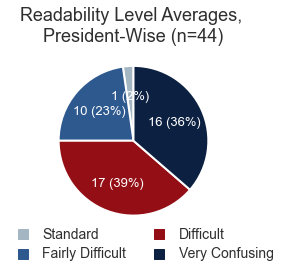

In [299]:
# 1. Readability Level Averages, President-Wise (PIE)

COLORS = ['#a4b6c1', '#2e598f', '#940f15', '#0c2141']
TEXT_COLOR = '#ffffff' #'#ebead9'
LABEL_TEXT_COLOR = '#2f2f2f'

df_read_pie = pd.DataFrame()
df_read_pie = df_read.groupby('avg_level').count().drop(columns=['std_score', 'year', 'political_party']).rename(columns = {'avg_score':'count'}) 
sort_lev = ['standard', 'fairly difficult', 'difficult', 'very confusing']
df_read_pie = df_read_pie.reindex(sort_lev)

def format_label(pct, data):
    absolute = int(round(pct/100.*np.sum(data)))
    return str(absolute) + " (" + str(int(round(pct))) + "%)"

ax = plt.gca()
texts = ax.pie(df_read_pie['count'], autopct=lambda pct: format_label(pct, df_read_pie['count']), colors=COLORS, startangle=90, wedgeprops=dict(linewidth=2, edgecolor='w'))
plt.rcParams['font.size'] = 13
plt.rcParams['text.color'] = TEXT_COLOR

# Make the title
ax.set_title("Readability Level Averages, \nPresident-Wise (n=" + str(sum(df_read_pie['count'])) + ")", fontsize=18, color=LABEL_TEXT_COLOR)

# Make the legend
custom_lines = [Line2D([0], [0], color=c, marker="s", markersize=10, linewidth=0, label=lab.title()) for c, lab in zip(COLORS, df_read_pie.index)]
leg = plt.legend(handles=custom_lines, loc="center", ncol=2, framealpha=0, bbox_to_anchor=(0.55, -0.05))
for text in leg.get_texts():
    plt.setp(text, color = LABEL_TEXT_COLOR, fontsize=14)
    
plt.tight_layout()
plt.savefig('readability-pie.png')

The above pie graph represents the distribution of the average readability levels of each president. We can see that there are three values not represented -- namely, the Very Easy, Easy, and Fairly Easy levels; moreover, there is only one president whose average readability level falls into Standard, President Trump. We can see that an overwhelming majority (75%) of presidential speeches fall into the Difficult and Very Confusing categories. According to the Flesh-Kincaid formula breakdown, the shorter the sentences and words contained within a text, the easier it is to read. From this definition coupled with this visualization, we can hypothesize that presidential speeches tend to be more complicated than the average English speaker's sentences.

GitHub link: TODO

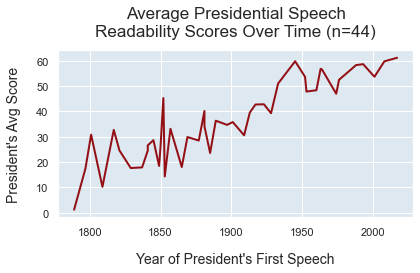

In [297]:
# 2. Average Presidential Speech Readability Scores Over Time (LINE)

TEXT_COLOR = '#2f2f2f'
sns.set(rc={'axes.facecolor':'#dde8f0'})

df_read.set_index('year')['avg_score'].plot(linewidth=2, color='#940f15')

plt.xlabel("Year of President's First Speech", labelpad=15, fontsize=14)
plt.ylabel("President's Avg Score", labelpad=15, fontsize=14)
plt.title("Average Presidential Speech\nReadability Scores Over Time (n=" + str(len(df_read.index)) + ")", 
          y=1.05, fontsize=17)

plt.tight_layout()
plt.savefig('readability-line.png')

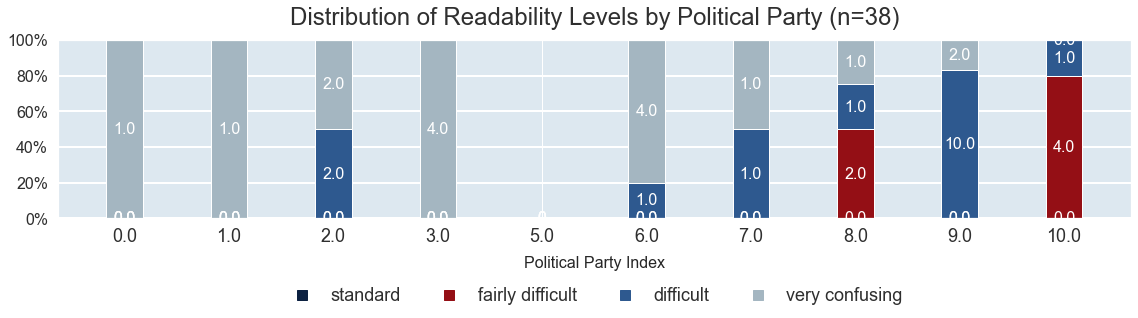

In [379]:
# 3. (STACKED BAR -- NEW VISUALIZATION TYPE)
# Create a new dataframe to store the quantities of each subbar
df_q = pd.DataFrame(columns=['political_party', 'standard', 'fairly difficult', 'difficult', 'very confusing'])

# Get the size of the intersection of the given parameters
def get_q(party, level):
    return len(df_read[(df_read['political_party'] == party) & (df_read['avg_level'] == level)])

# Get unique parties

def no_nans(elem):
    return str(elem) != 'nan'

parties = sorted(list(filter(no_nans, df_read['political_party'].unique())))
df_q['political_party'] = parties

# Get unique readability levels
levels = ['standard', 'fairly difficult', 'difficult', 'very confusing']

# Add the quantity of each combination to the quantity dataframe
for party in parties:
    for level in levels:
        df_q.loc[party, level] = get_q(party, level)
        
df_q.fillna(0, inplace=True)
df_q.drop_duplicates(subset='political_party', inplace=True)

# Some constants for the bar chart
NUM_X = len(parties)
BAR_WIDTH = 0.35 # width of each bar
GRID_COLOR ='white'
TEXT_COLOR = '#2f2f2f'
COLORS = ['#0c2141', '#940f15', '#2e598f', '#a4b6c1']

df_q = df_q.set_index(['political_party'])

# Get the bar values for the given party as an array (percentages and raw)
def get_vals(party): 
    std_raw = df_q.loc[party, 'standard']
    f_diff_raw = df_q.loc[party, 'fairly difficult']
    diff_raw = df_q.loc[party, 'difficult']
    conf_raw = df_q.loc[party, 'very confusing']
    
    sum_raw = std_raw + f_diff_raw + diff_raw + conf_raw
    cum_sums.append(sum_raw) 
    
    if (sum_raw != 0):
        std_perc = round(std_raw * 100 / sum_raw)
        f_diff_perc = round(f_diff_raw * 100 / sum_raw)
        diff_perc = round(diff_raw * 100 / sum_raw)
        conf_perc = round(conf_raw * 100 / sum_raw)
        
        return np.array([std_perc, f_diff_perc, diff_perc, conf_perc, 
                         std_raw, f_diff_raw, diff_raw, conf_raw])
    
    return np.array([0, 0, 0, 0, 0, 0, 0, 0])

# Plot a bar with the given values
def plot_bar(index, values):
    values_perc = values[:4]
    values_raw = values[4:]
    indices = np.repeat(index,repeats=len(values)) 
    cumsum_bottom_values = np.concatenate([np.zeros(1), np.cumsum(values)[:-1]], axis=0)     
    for ind, perc, raw, bottom, color in zip(indices, values_perc, values_raw, cumsum_bottom_values, COLORS):
        plt.bar(ind, perc, bottom=bottom, color=color, width=BAR_WIDTH)
        plt.text(ind, bottom+perc/2, raw, ha="center", va="center", fontsize=16)

plt.figure(figsize=(NUM_X * 1.6, 5)) # size of bar chart figure

x = np.arange(1, NUM_X + 1, 1)

cum_sums = []
job_N_dict = {}
i = 1
for party in parties:
    values = get_vals(party)
    plot_bar(i, values)
    i += 1   
        
# Get the axis attribute.
ax = plt.gca()

# Title the graph, calculating the sum of cumulative sums.        
total = str(sum(cum_sums))
plt.title('Distribution of Readability Levels by Political Party (n=' + total + ')', fontsize=24, pad=15, color=TEXT_COLOR)

# Label the bars on x-axis with the cohort nums
plt.xticks(x, parties, fontsize=18, color=TEXT_COLOR)

# Label the y-axis with percentages
y_vals = np.arange(0, 110, 20)
y_labels = [(str(y) + '%') for y in y_vals] # min 0%, max 100%, step 10%
plt.yticks(y_vals, y_labels, fontsize=16, color=TEXT_COLOR) # y-ticks (min, max, step)

# Add the horizontal grid lines and remove the top and side borders.
plt.grid(color=GRID_COLOR, which='major', axis='y', linestyle='solid', linewidth=2)
ax.set_axisbelow(True)
ax.set_xlabel('Political Party Index', fontsize=16, labelpad=10)

# Make the legend (bottom center).
custom_lines = [Line2D([0], [0], color=c, marker="s", markersize=10, linewidth=0, label=lab) for c, lab in zip(COLORS, levels)]
leg = ax.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=len(levels), framealpha=0, prop={'size': 16})
for text in leg.get_texts():
    plt.setp(text, color = TEXT_COLOR, fontsize=18)
    
plt.tight_layout()
plt.savefig('fig_23.png')

In [370]:
df_q
# TODOM: why is this mapping the colors wrong. who's to say? i am goinng to sleep

,standard,fairly difficult,difficult,very confusing
political_party,,,,
0.0,0,0,0,1
1.0,0,0,0,1
2.0,0,0,2,2
3.0,0,0,0,4
5.0,0,0,0,0
6.0,0,0,1,4
7.0,0,0,1,1
8.0,0,2,1,1
9.0,0,0,10,2


In [314]:
# 4. (BOXPLOT-- NEW VISUALIZATION TYPE)


----------------------------
**3.2.2 Sentimentality Vizualizations**

We experimented with scatterplot visualizations of the usage/importance of all the relevant features, and decided to keep in this report the female-gendered terms, terms for equality, terms for race, and terms for religion, as the male-gendered terms and total gendered term counts showed little to no variation.

In [274]:
# generate a scatterplot visualization of the given column, indicate whether it is raw or importance term data
# first year of president's speech goes on y-axis
def scatter(col, raw):
    if raw:
        df_avg = df_viz.sort_values(by="year").groupby('president')[[col, 'year']].mean()
        ax = sns.regplot(x=df_avg["year"], y=df_avg[col], fit_reg=False)
    else: # importance features
        df_viz_unique = df_viz.sort_values(by="year").drop_duplicates(subset="president")
        ax = sns.regplot(x=df_viz_unique["year"], y=df_viz_unique[col], fit_reg=False)
    plt.tight_layout()
    plt.savefig(col + '_scatter.png')

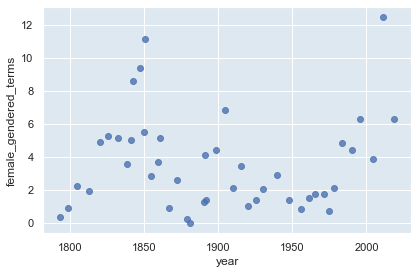

In [275]:
# Usage of Female-Gendered Terms
scatter('female_gendered_terms', True)

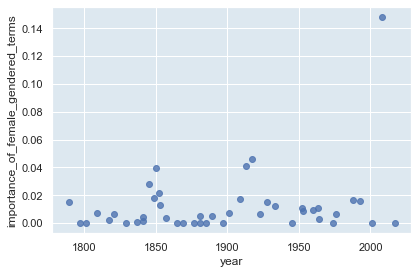

In [276]:
# Importance of Female-Gendered Terms
scatter('importance_of_female_gendered_terms', False)

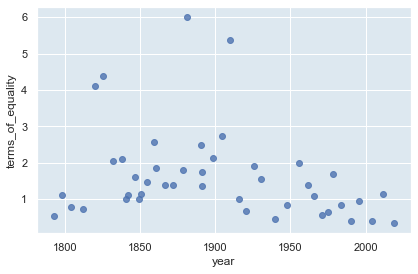

In [277]:
# Usage of Equality-Related Terms
scatter('terms_of_equality', True)

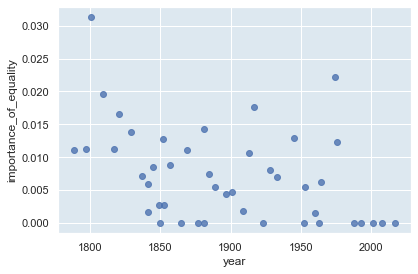

In [279]:
# Importance of Equality-Related Terms
scatter('importance_of_equality', False)

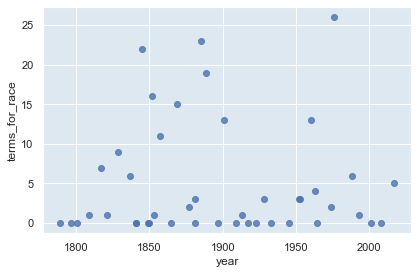

In [282]:
# Usage of Race-Related Terms
scatter('terms_for_race', True)

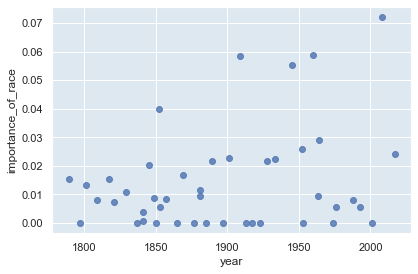

In [283]:
# Importance of Race-Related Terms
scatter('importance_of_race', False)

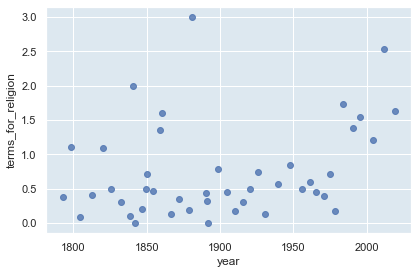

In [278]:
# Usage of Religious Terms
scatter('terms_for_religion', True)

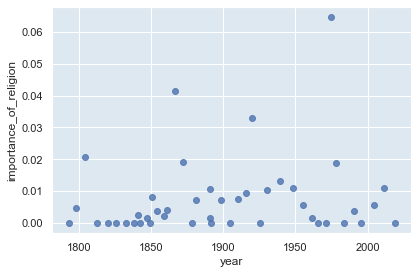

In [284]:
# Importance of Religious Terms
scatter('importance_of_religion', True)

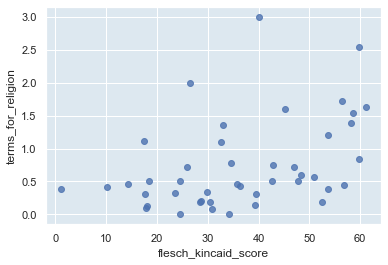

In [294]:
# Inter-feature correlation
# NOTE: Constance you can play with these values if you wanna 
df_avg = df_viz.sort_values(by="year").groupby('president')[['terms_for_religion', 'flesch_kincaid_score']].mean()
ax = sns.regplot(x=df_avg["flesch_kincaid_score"], y=df_avg['terms_for_religion'], fit_reg=False)

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.

### 0. Executive Summary
- Mara: Final writeup, editing.
- Constance: Writeup drafting.
- Eoin: Writeup drafting.

### 1. Introduction
- Mara: Final writeup, editing.
- Constance: Hypothesis/question drafting.

### 2. Method

**2.1 Data Acquisition**
- Constance: Web scraping script for copora data, writeup.
- Eoin: Web scraping script for Trump's speeches.
- Mara: Editing (joining with FP3 writeup).

**2.2 Data Analysis**
- Mara: Final writeup, editing.
- Constance, Eoin: Writeup drafting.

### 3. Results
**3.1 Data Wrangling**
- Constance: Implementation.
- Mara: Documentation, editing.

**3.2 Data Exploration**
- Mara: Visualizations, interpretations.

**3.3 Model Construction**
- Eoin: Implementation.
- Mara: Documentation, editing.

**3.4 Model Evaluation**
- Eoin: Implementation.
- Mara: Documentation, editing.

**3.5 Model Optimization**
- Eoin: Implementation.
- Mara: Documentation, editing.

**3.6 Model Testing**
- Eoin: Implementation.
- Mara: Documentation, editing.

### 4. Discussion
- Mara: Final writeup (interpretation and conclusion).
- Constance, Eoin: Interpretation drafting.